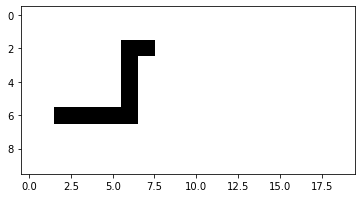

In [ ]:
# Vom reprezenta labirintul printr-un tablou bidimensional (o listă de liste)
# celulele libere vor avea valoarea 0, iar pereții valoarea 1

height = 10
width = 20

# Construim labirintul ca o listă de liste
labyrinth = [[0 for c in range(width)] for r in range(height)]

# Așezăm câteva obstacole pe hartă
for r in range(2, 7):
    labyrinth[r][6] = 1
    labyrinth[6][r] = 1
labyrinth[2][7] = 1

%matplotlib inline
import matplotlib.pyplot as pyplot
pyplot.imshow(labyrinth, cmap='Greys', interpolation='nearest');

In [ ]:
# Punctul de plecare și punctul destinație vor fi reprezentate prin tupluri
start = (5, 5)
final = (8, 8)

# Funcții lambda, funcționale, lucruri frumoase
is_final = lambda position: position == final

# Map
list(map(is_final, [(1,1), (3, 6), (8, 8)]))

[False, False, True]

In [ ]:
# Filter
list(filter(lambda x: x % 3 == 2, range(20)))  # ==> [2, 5, 8, 11, 14, 17]


[2, 5, 8, 11, 14, 17]

In [ ]:
from functools import reduce

# Reduce
reduce(lambda x, y: [y] + x, [], [1,2,3])  # ==> [1, 2, 3]

[1, 2, 3]

In [ ]:
# Scrieți o funcție care verifică dacă un tuplu dat reprezintă
# coordonatele unei poziții libere de pe hartă (coordonatele nu depășesc limitele hărții
# și acolo nu se găsește un obstacol)

def is_good(pos):
    r, c = pos
    
    if r < 0 or r >= height or c < 0 or c >= width:
        return False

    return not labyrinth[r][c]


list(map(is_good, [(-1,2), (height,3), (width,4), (5,5), (6,6)])) # False, False, False, True, False

[False, False, False, True, False]

In [ ]:
# Scrieți o funcție care întoarce celulele vecine poziției date (doar cele libere)
# Folosiți funcționala filter și funcția is_good scrisă anterior

deltas = [(0, 1), (-1, 0), (0, -1), (1, 0)]

def get_neighbours(pos):
    r, c = pos
    return list(filter(is_good, [(r + delta[0], c + delta[1]) for delta in deltas]))


[get_neighbours(p) for p in [(0,9), (5,5)]] # ==> [[(1,9), (0,8), (0, 10)], [(4,5), (5,4)]] - nu neaparat în ordinea asta

[[(0, 10), (0, 8), (1, 9)], [(4, 5), (5, 4)]]

In [ ]:
from math import sqrt


def euclidean_distance(a, b):
    return sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)


euclidean_distance((2,3), (4, 7))   # ==> 4.4721359

4.47213595499958

In [ ]:
def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


manhattan_distance((2,3), (4,0))  # ==> 5

5

In [ ]:
from heapq import heappop, heappush

priority_queue = []
heappush(priority_queue, (2, 'A'))
heappush(priority_queue, (1, 'B'))
heappush(priority_queue, (1.5, 'C'))

print(heappop(priority_queue))  # ==> (1, 'B')
print(heappop(priority_queue))  # ==> (1.5, 'C')
print(heappop(priority_queue))  # ==> (2, 'A')

(1, 'B')
(1.5, 'C')
(2, 'A')


In [ ]:
# Dicționare
d = {}
d['doi'] = 2
d['trei'] = 3

print(d['doi']) # ==> 2

# Funcția get
print(d.get('trei'))  # ==> 3
print(d.get('patru', 'Nu am găsit!'))  # ==> Nu am găsit!

for (key, value) in d.items():
    print(key, " -> ", value)

2
3
Nu am găsit!
doi  ->  2
trei  ->  3


In [ ]:
def astar(start, end, h):
    # Frontiera, ca listă (heap) de tupluri (cost-total-estimat, nod)
    frontier = []
    heappush(frontier, (0 + h(start, end), start))
    # Nodurile descoperite ca dicționar nod -> (părinte, cost-până-la-nod)
    discovered = {start: (None, 0)}
    while frontier:
        crt_f, crt_node = heappop(frontier)
        crt_g = discovered[crt_node][1]

        if crt_node == end:
            break

        for neigh in get_neighbours(crt_node):
            neigh_g = crt_g + 1

            if neigh not in discovered or neigh_g < discovered[neigh][1]:
                discovered[neigh] = (crt_node, neigh_g)
                heappush(frontier, (neigh_g + h(neigh, end), neigh))
    
    cost_map = [[discovered[(r,c)][1] if (r,c) in discovered else 0 for c in range(width)]for r in range(height)]
    pyplot.imshow(cost_map , cmap='Greys', interpolation='nearest');
    
    # Refacem drumul
    path = []
    crt_node = end
    while crt_node:
        path.append(crt_node)
        crt_node = discovered[crt_node][0]

    return path # drumul, ca listă de poziții

[(8, 8),
 (7, 8),
 (7, 7),
 (7, 6),
 (7, 5),
 (7, 4),
 (7, 3),
 (7, 2),
 (7, 1),
 (6, 1),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5)]

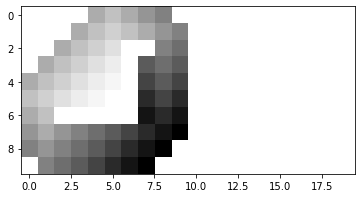

In [ ]:
astar(start, final, euclidean_distance)

[(8, 8),
 (7, 8),
 (6, 8),
 (5, 8),
 (4, 8),
 (3, 8),
 (2, 8),
 (1, 8),
 (1, 7),
 (1, 6),
 (1, 5),
 (2, 5),
 (3, 5),
 (4, 5),
 (5, 5)]

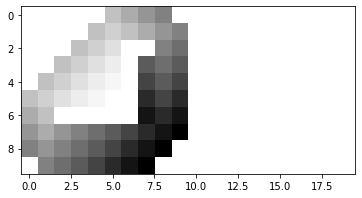

In [ ]:
astar(start, final, manhattan_distance)

[(8, 8),
 (7, 8),
 (6, 8),
 (5, 8),
 (4, 8),
 (3, 8),
 (2, 8),
 (1, 8),
 (1, 7),
 (1, 6),
 (1, 5),
 (2, 5),
 (3, 5),
 (4, 5),
 (5, 5)]

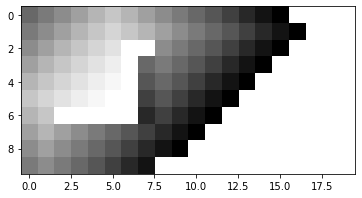

In [ ]:
astar(start, final, lambda x, y: 0)  # fara euristica